[0.         0.001001   0.002002   0.003003   0.004004   0.00500501
 0.00600601 0.00700701 0.00800801 0.00900901 0.01001001 0.01101101
 0.01201201 0.01301301 0.01401401 0.01501502 0.01601602 0.01701702
 0.01801802 0.01901902 0.02002002 0.02102102 0.02202202 0.02302302
 0.02402402 0.02502503 0.02602603 0.02702703 0.02802803 0.02902903
 0.03003003 0.03103103 0.03203203 0.03303303 0.03403403 0.03503504
 0.03603604 0.03703704 0.03803804 0.03903904 0.04004004 0.04104104
 0.04204204 0.04304304 0.04404404 0.04504505 0.04604605 0.04704705
 0.04804805 0.04904905 0.05005005 0.05105105 0.05205205 0.05305305
 0.05405405 0.05505506 0.05605606 0.05705706 0.05805806 0.05905906
 0.06006006 0.06106106 0.06206206 0.06306306 0.06406406 0.06506507
 0.06606607 0.06706707 0.06806807 0.06906907 0.07007007 0.07107107
 0.07207207 0.07307307 0.07407407 0.07507508 0.07607608 0.07707708
 0.07807808 0.07907908 0.08008008 0.08108108 0.08208208 0.08308308
 0.08408408 0.08508509 0.08608609 0.08708709 0.08808809 0.0890

D:\Anaconda2\envs\Python3\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


RuntimeError: matplotlib does not support generators as input

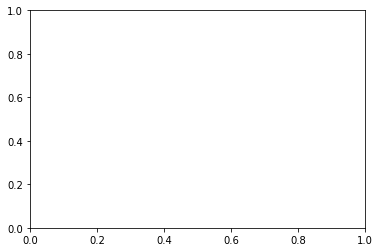

In [40]:
import math
import numpy as np
import matplotlib.pyplot as plt

class Circle:
    def __init__(x,y,r):
        self.x      = x
        self.y      = y
        self.r      = r

def circle_from_points(A,B,C):
    """creates a circle defined by three points"""
    
    midAB = midpoint(A,B)
    midBC = midpoint(B,C)
    
    slopeAB = slope(A,B)
    slopeBC = slope(B,C)
    
        #y - y1 = m(x - x1)
    #y - midAB[1] = slopeAB*(x - midAB[0])
    #y - midBC[1] = slopeBC*(x - midBC[0])
    
        #solve for x
    #slopeAB*(x - midAB[0]) + midAB[1] = slopeBC*(x - midBC[0]) + midBC[1]
    #slopeAB*(x - midAB[0]) - slopeBC*(x - midBC[0]) = midBC[1] - midAB[1]
    #slopeAB*x - slopeBC*x = midBC[1] - midAB[1] + slopeAB*midAB[0] - slopeBC*midBC[0]
    #x*(slopeAB - slopeBC) = slopeAB*midAB[0] - midAB[1] - slopeBC*midBC[0] + midBC[1]
    
    x = (slopeAB*midAB[0] - midAB[1] - slopeBC*midBC[0] + midBC[1])/(slopeAB - slopeBC)
    y = slopeAB*(x - midAB[0]) + midAB[1]
    
    centre = [x,y]
    
    r = dist2d(center, A)
    
    return Circle(x,y,r)
    
def midpoint(A,B):
    """finds midpoint between two points"""
    midpoint = [0.5*(A[0]+B[0]),0.5*(A[1]+B[1])]
    return midpoint

def slope(A,B):
    """finds the slope between two points"""
    slope = (B[1]-A[1])/(B[0]-A[0])
    return slope

def dist2d(A,B):
    """finds the two-dimensional distance between two points"""
    dist = math.sqrt((B[0]-A[0])**2+(B[1]-A[1])**2)
    return dist

def bezier_quadratic(p0, p1, p2, t):
    """returns a position on bezier curve defined by 3 points at t"""
    return p1 + (1-t)**2*(p0-p1) + t**2*(p2-p1)

def bezier_cubic(p0, p1, p2, p3, t):
    """returns a position on bezier curve defined by 4 points at t"""
    return (1-t)**3*p0 + 3*(1-t)**2*t*p1 + 3*(1-t)*t**2*p2 + t**3*p3

n = 1000.0
p0 = np.array([0,0])
p1 = np.array([1,2])
p2 = np.array([3,3])
p3 = np.array([5,0])
t = np.linspace(0.0,1.0,n)
print(t)
s = []
for i in range(len(t)):
    s.append(bezier_cubic(p0,p1,p2,p3,t[i]))

a = ([0] for i in s)
b = ([1] for i in s)
    
fig, ax = plt.subplots()
ax.plot(a,b)

ax.set(xlabel='x', ylabel='y',
        title='bezier test')
ax.grid()
       
plt.show()